In [4]:
import numpy as np
from numpy.linalg import norm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import (
    AutoModelForCausalLM,
    AutoModelForMaskedLM,
    AutoModelForSeq2SeqLM,
    AutoModel,
)

In [5]:
bert = AutoModelForCausalLM.from_pretrained("bert-base-uncased")
distilbert = AutoModelForMaskedLM.from_pretrained("distilbert/distilbert-base-uncased")
distilgpt = AutoModelForCausalLM.from_pretrained("distilbert/distilgpt2")
albert = AutoModelForMaskedLM.from_pretrained("albert/albert-base-v1")
bart = AutoModel.from_pretrained("facebook/bart-base")
deberta = AutoModel.from_pretrained("microsoft/deberta-base")
flant5 = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base")
roberta = AutoModelForMaskedLM.from_pretrained("FacebookAI/roberta-base")
gpt2 = AutoModelForCausalLM.from_pretrained("openai-community/gpt2")
gpt = AutoModelForCausalLM.from_pretrained("openai-community/openai-gpt")
# llama2_7b = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-2-7b-chat-hf")
# tinyllama = AutoModelForCausalLM.from_pretrained("TinyLlama/TinyLlama-1.1B-Chat-v1.0")
# mistral7b = AutoModelForCausalLM.from_pretrained("mistralai/Mistral-7B-v0.1")

If you want to use `BertLMHeadModel` as a standalone, add `is_decoder=True.`
Some weights of the model checkpoint at albert/albert-base-v1 were not used when initializing AlbertForMaskedLM: ['albert.pooler.bias', 'albert.pooler.weight']
- This IS expected if you are initializing AlbertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


['bert', 'distilbert', 'albert', 'bart', 'flanT5', 'roberta', 'gpt2', 'gpt1', 'llama2-7b', 'tinyllama', 'mistral7b']


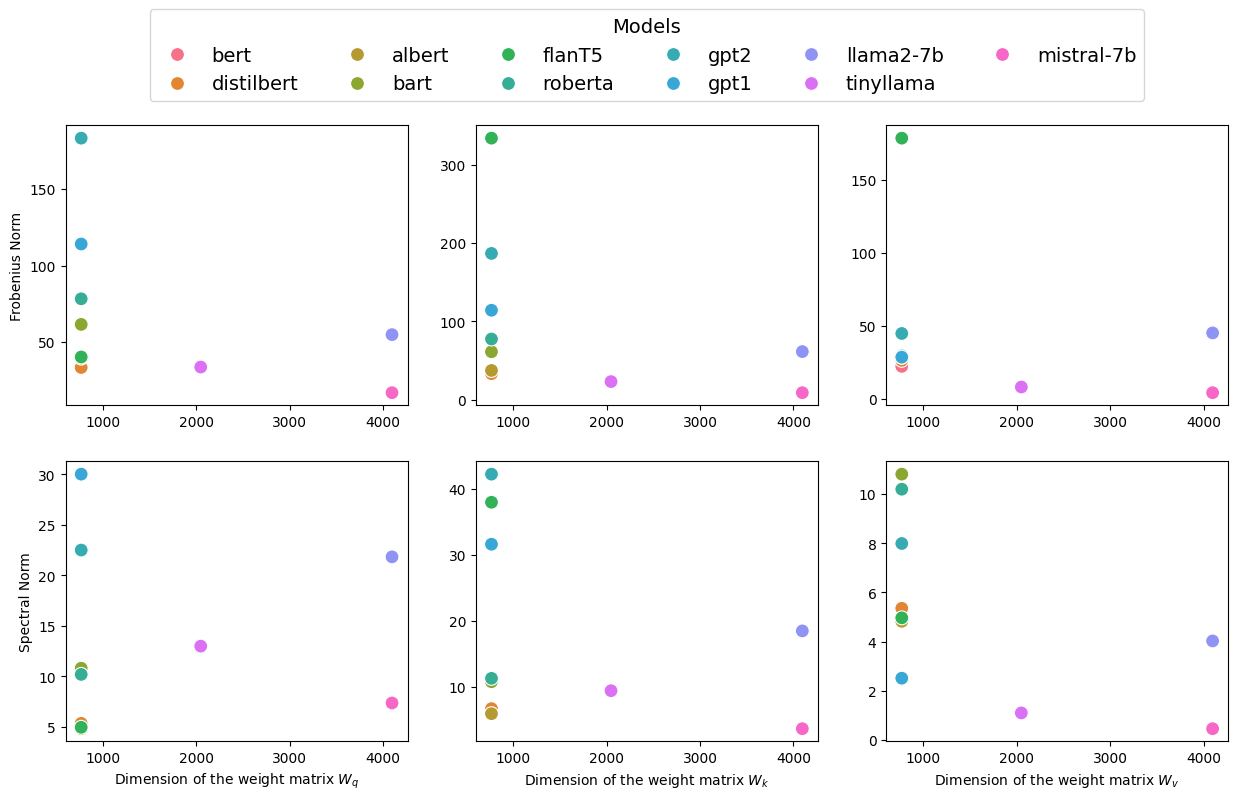

: 

In [6]:
data = dict()

## Small Language Models
data["bert"] = (
    norm(bert.bert.encoder.layer[0].attention.self.query.weight.data, ord="fro"),
    bert.bert.encoder.layer[0].attention.self.query.weight.data.shape[0],
)
data["distilbert"] = (
    norm(
        distilbert.distilbert.transformer.layer[0].attention.q_lin.weight.data,
        ord="fro",
    ),
    distilbert.distilbert.transformer.layer[0].attention.q_lin.weight.data.shape[0],
)
data["albert"] = (
    norm(
        albert.albert.encoder.albert_layer_groups[0]
        .albert_layers[0]
        .attention.query.weight.data,
        ord="fro",
    ),
    albert.albert.encoder.albert_layer_groups[0]
    .albert_layers[0]
    .attention.query.weight.data.shape[0],
)
data["bart"] = (
    norm(bart.encoder.layers[0].self_attn.q_proj.weight.data, ord="fro"),
    bart.encoder.layers[0].self_attn.q_proj.weight.data.shape[0],
)
data["flanT5"] = (
    norm(flant5.encoder.block[0].layer[0].SelfAttention.q.weight.data, ord="fro"),
    flant5.encoder.block[0].layer[0].SelfAttention.q.weight.data.shape[0],
)
data["roberta"] = (
    norm(roberta.roberta.encoder.layer[0].attention.self.query.weight.data, ord="fro"),
    roberta.roberta.encoder.layer[0].attention.self.query.weight.data.shape[0],
)
data["gpt2"] = (
    norm(gpt2.transformer.h[0].attn.c_attn.weight.data[:, :768], ord="fro"),
    gpt2.transformer.h[0].attn.c_attn.weight.data.shape[0],
)
data["gpt1"] = (
    norm(gpt.transformer.h[0].attn.c_attn.weight.data[:, :768], ord="fro"),
    gpt.transformer.h[0].attn.c_attn.weight.data.shape[0],
)

## Large Language Models, Results from Kaggle
data["llama2-7b"] = (
    54.786686,
    4096,
)  # llama2_7b.model.layers[0].self_attn.q_proj.weight.data
data["tinyllama"] = (
    33.58497,
    2048,
)  ## tinyllama.model.layers[0].self_attn.q_proj.weight.data
data["mistral7b"] = (
    16.801783,
    4096,
)  ## mistral7b.model.layers[0].self_attn.q_proj.weight.data

q_l2_norms = np.array(list(data.values()))[:, 0]
shapes = np.array(list(data.values()))[:, 1]
models = list(data.keys())

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 8))

matplotlib.rcParams.update({"font.size": 14})


ax1.set(ylabel="Frobenius Norm")

sns.scatterplot(ax=ax1, x=shapes, y=q_l2_norms, hue=models, s=100)
ax1.legend([], [], frameon=False)


data = dict()

## Small Language Models
data["bert"] = (
    norm(bert.bert.encoder.layer[0].attention.self.key.weight.data, ord="fro"),
    bert.bert.encoder.layer[0].attention.self.key.weight.data.shape[0],
)
data["distilbert"] = (
    norm(
        distilbert.distilbert.transformer.layer[0].attention.k_lin.weight.data,
        ord="fro",
    ),
    distilbert.distilbert.transformer.layer[0].attention.k_lin.weight.data.shape[0],
)
data["albert"] = (
    norm(
        albert.albert.encoder.albert_layer_groups[0]
        .albert_layers[0]
        .attention.key.weight.data,
        ord="fro",
    ),
    albert.albert.encoder.albert_layer_groups[0]
    .albert_layers[0]
    .attention.key.weight.data.shape[0],
)
data["bart"] = (
    norm(bart.encoder.layers[0].self_attn.k_proj.weight.data, ord="fro"),
    bart.encoder.layers[0].self_attn.k_proj.weight.data.shape[0],
)
data["flanT5"] = (
    norm(flant5.encoder.block[0].layer[0].SelfAttention.k.weight.data, ord="fro"),
    flant5.encoder.block[0].layer[0].SelfAttention.k.weight.data.shape[0],
)
data["roberta"] = (
    norm(roberta.roberta.encoder.layer[0].attention.self.key.weight.data, ord="fro"),
    roberta.roberta.encoder.layer[0].attention.self.key.weight.data.shape[0],
)
data["gpt2"] = (
    norm(gpt2.transformer.h[0].attn.c_attn.weight.data[:, 768 : 768 * 2], ord="fro"),
    gpt2.transformer.h[0].attn.c_attn.weight.data.shape[0],
)
data["gpt1"] = (
    norm(gpt.transformer.h[0].attn.c_attn.weight.data[:, 768 : 768 * 2], ord="fro"),
    gpt.transformer.h[0].attn.c_attn.weight.data.shape[0],
)

## Large Language Models, Results from Kaggle
data["llama2-7b"] = (
    61.356163,
    4096,
)  ## llama2_7b.model.layers[0].self_attn.k_proj.weight.data
data["tinyllama"] = (
    22.997742,
    2048,
)  ## tinyllama.model.layers[0].self_attn.k_proj.weight.data
data["mistral-7b"] = (
    8.800585,
    4096,
)  ## mistral7b.model.layers[0].self_attn.k_proj.weight.data

k_l2_norms = np.array(list(data.values()))[:, 0]
shapes = np.array(list(data.values()))[:, 1]
models = list(data.keys())


sns.scatterplot(ax=ax2, x=shapes, y=k_l2_norms, hue=models, s=100)
ax2.legend(title="Models", bbox_to_anchor=(0.5, 1.45), loc="upper center", ncol=6)
# plt.savefig("Wk_Frobeninus.pdf", format="pdf", bbox_inches="tight")


data = dict()

## Small Language Models
data["bert"] = (
    norm(bert.bert.encoder.layer[0].attention.self.value.weight.data, ord="fro"),
    bert.bert.encoder.layer[0].attention.self.value.weight.data.shape[0],
)
data["distilbert"] = (
    norm(
        distilbert.distilbert.transformer.layer[0].attention.v_lin.weight.data,
        ord="fro",
    ),
    distilbert.distilbert.transformer.layer[0].attention.v_lin.weight.data.shape[0],
)
data["albert"] = (
    norm(
        albert.albert.encoder.albert_layer_groups[0]
        .albert_layers[0]
        .attention.value.weight.data,
        ord="fro",
    ),
    albert.albert.encoder.albert_layer_groups[0]
    .albert_layers[0]
    .attention.value.weight.data.shape[0],
)
data["bart"] = (
    norm(bart.encoder.layers[0].self_attn.v_proj.weight.data, ord="fro"),
    bart.encoder.layers[0].self_attn.v_proj.weight.data.shape[0],
)
data["flanT5"] = (
    norm(flant5.encoder.block[0].layer[0].SelfAttention.v.weight.data, ord="fro"),
    flant5.encoder.block[0].layer[0].SelfAttention.v.weight.data.shape[0],
)
data["roberta"] = (
    norm(roberta.roberta.encoder.layer[0].attention.self.value.weight.data, ord="fro"),
    roberta.roberta.encoder.layer[0].attention.self.value.weight.data.shape[0],
)
data["gpt2"] = (
    norm(gpt2.transformer.h[0].attn.c_attn.weight.data[:, 768 * 2 :], ord="fro"),
    gpt2.transformer.h[0].attn.c_attn.weight.data.shape[0],
)
data["gpt1"] = (
    norm(gpt.transformer.h[0].attn.c_attn.weight.data[:, 768 * 2 :], ord="fro"),
    gpt.transformer.h[0].attn.c_attn.weight.data.shape[0],
)

## Large Language Models, Results from Kaggle
data["llama2-7b"] = (
    45.012104,
    4096,
)  ## llama2_7b.model.layers[0].self_attn.v_proj.weight.data
data["tinyllama"] = (
    7.976361,
    2048,
)  ## tinyllama.model.layers[0].self_attn.v_proj.weight.data
data["mistral-7b"] = (
    4.0776424,
    4096,
)  ## mistral7b.model.layers[0].self_attn.v_proj.weight.data

v_l2_norms = np.array(list(data.values()))[:, 0]
shapes = np.array(list(data.values()))[:, 1]
models = list(data.keys())


sns.scatterplot(ax=ax3, x=shapes, y=v_l2_norms, hue=models, s=100)
ax3.legend([], [], frameon=False)
# plt.legend(title='Models', bbox_to_anchor=(-0.75, 1.35), loc='upper center', ncol=6)
# plt.savefig("Frobeninus.pdf", format="pdf", bbox_inches="tight")

data = dict()

## Small Language Models
data["bert"] = (
    np.linalg.svd(bert.bert.encoder.layer[0].attention.self.query.weight.data)[1][0],
    bert.bert.encoder.layer[0].attention.self.query.weight.data.shape[0],
)
data["distilbert"] = (
    np.linalg.svd(
        distilbert.distilbert.transformer.layer[0].attention.q_lin.weight.data
    )[1][0],
    distilbert.distilbert.transformer.layer[0].attention.q_lin.weight.data.shape[0],
)
data["albert"] = (
    np.linalg.svd(
        albert.albert.encoder.albert_layer_groups[0]
        .albert_layers[0]
        .attention.query.weight.data
    )[1][0],
    albert.albert.encoder.albert_layer_groups[0]
    .albert_layers[0]
    .attention.query.weight.data.shape[0],
)
data["bart"] = (
    np.linalg.svd(bart.encoder.layers[0].self_attn.q_proj.weight.data)[1][0],
    bart.encoder.layers[0].self_attn.q_proj.weight.data.shape[0],
)
data["flanT5"] = (
    np.linalg.svd(flant5.encoder.block[0].layer[0].SelfAttention.q.weight.data)[1][0],
    flant5.encoder.block[0].layer[0].SelfAttention.q.weight.data.shape[0],
)
data["roberta"] = (
    np.linalg.svd(roberta.roberta.encoder.layer[0].attention.self.query.weight.data)[1][
        0
    ],
    roberta.roberta.encoder.layer[0].attention.self.query.weight.data.shape[0],
)
data["gpt2"] = (
    np.linalg.svd(gpt2.transformer.h[0].attn.c_attn.weight.data[:, :768])[1][0],
    gpt2.transformer.h[0].attn.c_attn.weight.data.shape[0],
)
data["gpt1"] = (
    np.linalg.svd(gpt.transformer.h[0].attn.c_attn.weight.data[:, :768])[1][0],
    gpt.transformer.h[0].attn.c_attn.weight.data.shape[0],
)

## Large Language Models, Results from Kaggle notebook
data["llama-2-7b"] = (
    21.827143,
    4096,
)  # llama2_7b.model.layers[0].self_attn.q_proj.weight.data
data["TinyLlama"] = (
    12.993286,
    2048,
)  ## mistral7b.model.layers[0].self_attn.q_proj.weight.data
data["mistral-7b"] = (
    7.3723297,
    4096,
)  ## tinyllama.model.layers[0].self_attn.q_proj.weight.data


q_sp_norms = np.array(list(data.values()))[:, 0]
shapes = np.array(list(data.values()))[:, 1]
models = list(data.keys())

ax4.set(xlabel="Dimension of the weight matrix $W_q$", ylabel="Spectral Norm")

sns.scatterplot(ax=ax4, x=shapes, y=q_sp_norms, hue=models, s=100)

# plt.legend(title='Models')
ax4.legend([], [], frameon=False)


data = dict()

## Small Language Models
data["bert"] = (
    np.linalg.svd(bert.bert.encoder.layer[0].attention.self.key.weight.data)[1][0],
    bert.bert.encoder.layer[0].attention.self.key.weight.data.shape[0],
)
data["distilbert"] = (
    np.linalg.svd(
        distilbert.distilbert.transformer.layer[0].attention.k_lin.weight.data
    )[1][0],
    distilbert.distilbert.transformer.layer[0].attention.k_lin.weight.data.shape[0],
)
data["albert"] = (
    np.linalg.svd(
        albert.albert.encoder.albert_layer_groups[0]
        .albert_layers[0]
        .attention.key.weight.data
    )[1][0],
    albert.albert.encoder.albert_layer_groups[0]
    .albert_layers[0]
    .attention.key.weight.data.shape[0],
)
data["bart"] = (
    np.linalg.svd(bart.encoder.layers[0].self_attn.k_proj.weight.data)[1][0],
    bart.encoder.layers[0].self_attn.k_proj.weight.data.shape[0],
)
data["flanT5"] = (
    np.linalg.svd(flant5.encoder.block[0].layer[0].SelfAttention.k.weight.data)[1][0],
    flant5.encoder.block[0].layer[0].SelfAttention.k.weight.data.shape[0],
)
data["roberta"] = (
    np.linalg.svd(roberta.roberta.encoder.layer[0].attention.self.key.weight.data)[1][
        0
    ],
    roberta.roberta.encoder.layer[0].attention.self.key.weight.data.shape[0],
)
data["gpt2"] = (
    np.linalg.svd(gpt2.transformer.h[0].attn.c_attn.weight.data[:, 768 : 768 * 2])[1][
        0
    ],
    gpt2.transformer.h[0].attn.c_attn.weight.data.shape[0],
)
data["gpt1"] = (
    np.linalg.svd(gpt.transformer.h[0].attn.c_attn.weight.data[:, 768 : 768 * 2])[1][0],
    gpt.transformer.h[0].attn.c_attn.weight.data.shape[0],
)

## Large Language Models, Results from Kaggle notebook
data["llama-2-7b"] = (
    18.48904,
    4096,
)  # llama2_7b.model.layers[0].self_attn.k_proj.weight.data
data["TinyLlama"] = (
    9.44396,
    2048,
)  ## mistral7b.model.layers[0].self_attn.k_proj.weight.data
data["mistral-7b"] = (
    3.6989574,
    4096,
)  ## tinyllama.model.layers[0].self_attn.k_proj.weight.data


k_sp_norms = np.array(list(data.values()))[:, 0]
shapes = np.array(list(data.values()))[:, 1]
models = list(data.keys())

ax5.set(xlabel="Dimension of the weight matrix $W_k$")

sns.scatterplot(ax=ax5, x=shapes, y=k_sp_norms, hue=models, s=100)

# plt.legend(title='Models')
ax5.legend([], [], frameon=False)
# ax5.legend(title='Models', bbox_to_anchor=(0.5, 1.45), loc='upper center', ncol=6)

data = dict()

## Small Language Models
data["bert"] = (
    np.linalg.svd(bert.bert.encoder.layer[0].attention.self.query.weight.data)[1][0],
    bert.bert.encoder.layer[0].attention.self.query.weight.data.shape[0],
)
data["distilbert"] = (
    np.linalg.svd(
        distilbert.distilbert.transformer.layer[0].attention.q_lin.weight.data
    )[1][0],
    distilbert.distilbert.transformer.layer[0].attention.q_lin.weight.data.shape[0],
)
data["albert"] = (
    np.linalg.svd(
        albert.albert.encoder.albert_layer_groups[0]
        .albert_layers[0]
        .attention.query.weight.data
    )[1][0],
    albert.albert.encoder.albert_layer_groups[0]
    .albert_layers[0]
    .attention.query.weight.data.shape[0],
)
data["bart"] = (
    np.linalg.svd(bart.encoder.layers[0].self_attn.q_proj.weight.data)[1][0],
    bart.encoder.layers[0].self_attn.q_proj.weight.data.shape[0],
)
data["flanT5"] = (
    np.linalg.svd(flant5.encoder.block[0].layer[0].SelfAttention.q.weight.data)[1][0],
    flant5.encoder.block[0].layer[0].SelfAttention.q.weight.data.shape[0],
)
data["roberta"] = (
    np.linalg.svd(roberta.roberta.encoder.layer[0].attention.self.query.weight.data)[1][
        0
    ],
    roberta.roberta.encoder.layer[0].attention.self.query.weight.data.shape[0],
)
data["gpt2"] = (
    np.linalg.svd(gpt2.transformer.h[0].attn.c_attn.weight.data[:, 768 * 2 :])[1][0],
    gpt2.transformer.h[0].attn.c_attn.weight.data.shape[0],
)
data["gpt1"] = (
    np.linalg.svd(gpt.transformer.h[0].attn.c_attn.weight.data[:, 768 * 2 :])[1][0],
    gpt.transformer.h[0].attn.c_attn.weight.data.shape[0],
)

## Large Language Models, Results from Kaggle notebook
data["llama-2-7b"] = (
    4.026172,
    4096,
)  # llama2_7b.model.layers[0].self_attn.v_proj.weight.data
data["TinyLlama"] = (
    1.097935,
    2048,
)  ## mistral7b.model.layers[0].self_attn.v_proj.weight.data
data["mistral-7b"] = (
    0.45625666,
    4096,
)  ## tinyllama.model.layers[0].self_attn.v_proj.weight.data


v_sp_norms = np.array(list(data.values()))[:, 0]
shapes = np.array(list(data.values()))[:, 1]
models = list(data.keys())

ax6.set(xlabel="Dimension of the weight matrix $W_v$")

sns.scatterplot(ax=ax6, x=shapes, y=v_sp_norms, hue=models, s=100)

# plt.legend(title='Models')
ax6.legend([], [], frameon=False)


plt.savefig("MatrixNorm.pdf", format="pdf", bbox_inches="tight")
plt.show()